**PIA-Entrenamiento de una Red Neuronal Convolucional**

Grupo:007  
Hora:N1  
Frecuencia:Lunes-Miercoles-Viernes

Equipo 1

**Integrantes**

Monserrat Marroquin Montes 1897868 IMTC

Alexa Estefania Navarro Mata 1918022 IMTC

Francisco Jesus Antonio Hernandez 1915843 IMTC

Emilio Israel Álvarez Duarte 1843268 IMTC

Erick Ulises Ávila Sánchez 1918961 IMTC

Carlos Ernesto Álvarez Torres 1986722 IMTC

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

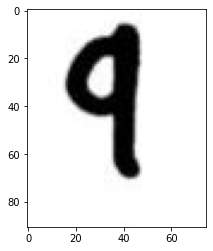

In [ ]:
imagenes_dataset = []
etiquetas_dataset = []
i=0
h=0
while(i<500):
  file = '/content/'+str(i)+'.png' 
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  if(h==9):
    imagenes_dataset.append(img_resized)
    etiquetas_dataset.append(h)
    h=0
  else:
    imagenes_dataset.append(img_resized)
    etiquetas_dataset.append(h)
    h=h+1
  i=i+1

  plt.imshow(test_image, cmap='gray')
#remplazar 
newimagenes=np.array(imagenes_dataset)
newetiquetas=np.array(etiquetas_dataset)

In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

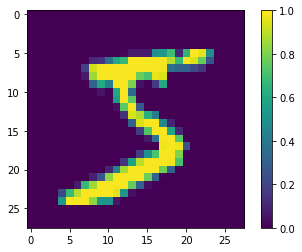

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

newimagenes = newimagenes / 255.0

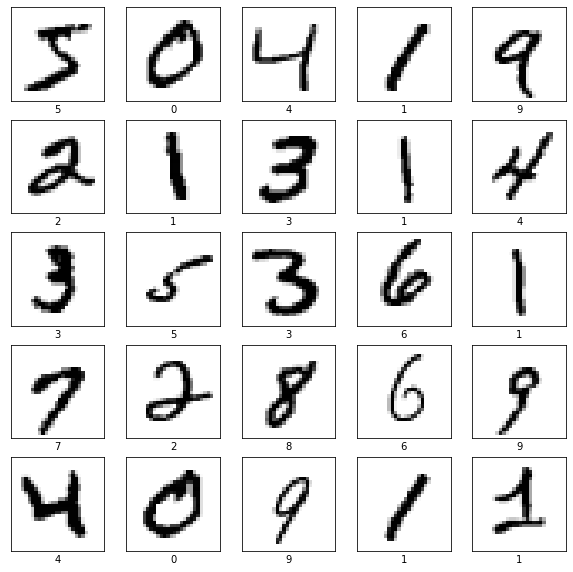

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2561 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1127 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0795 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [ ]:
test_loss, test_acc = model.evaluate(newimagenes,  newetiquetas, verbose=2)

print('\nTest accuracy:', test_acc)

16/16 - 0s - loss: 11.5661 - accuracy: 0.2560 - 189ms/epoch - 12ms/step

Test accuracy: 0.25600001215934753


In [ ]:
predictions = model.predict(newimagenes)

16/16 [==============================] - 0s 2ms/step


In [ ]:
predictions[0]

array([3.8702670e-11, 1.7230191e-06, 3.8735339e-04, 1.5859117e-03,
       6.1068472e-22, 9.9800342e-01, 1.7308974e-05, 5.5221568e-07,
       3.8118549e-06, 8.2578833e-11], dtype=float32)

In [ ]:
np.argmax(predictions[0])

5

In [ ]:
newetiquetas[0]

0

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

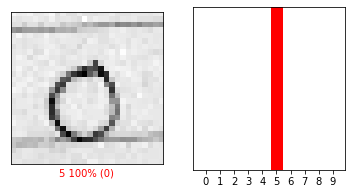

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetas, newimagenes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetas)
plt.show()

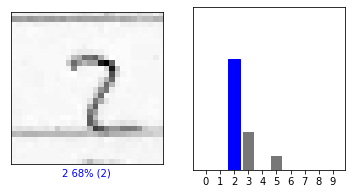

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetas, newimagenes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetas)
plt.show()

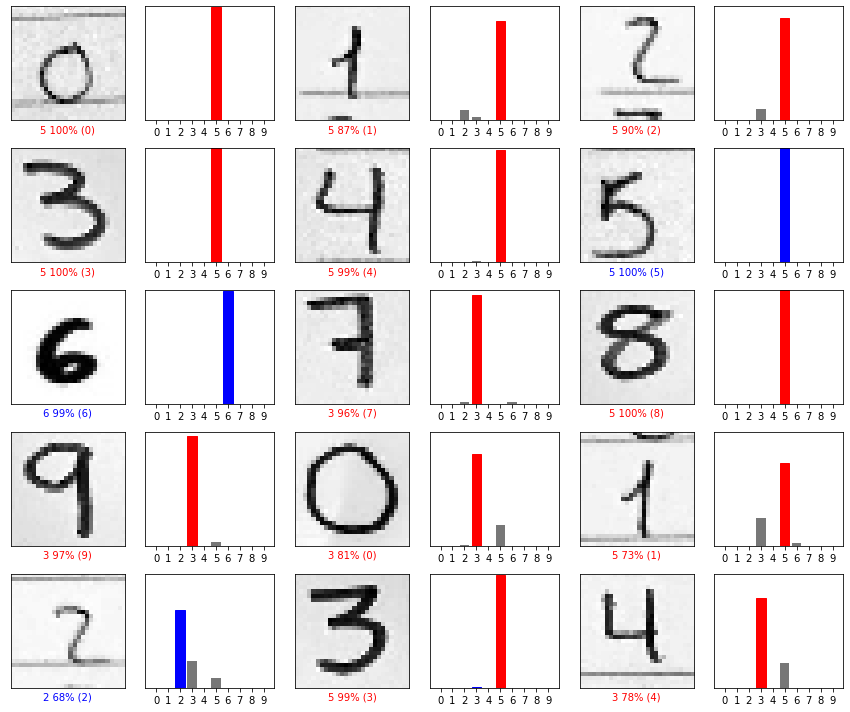

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], newetiquetas, newimagenes)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], newetiquetas)
plt.tight_layout()
plt.show()

In [ ]:
img = newimagenes[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[4.7437948e-10 5.9335947e-05 9.5652513e-02 3.3384033e-02 8.2516216e-20
  8.6898053e-01 8.4231342e-06 1.3714746e-05 1.9014928e-03 2.4828226e-09]]


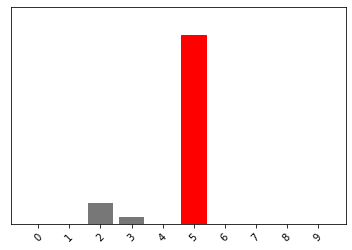

In [ ]:
plot_value_array(1, predictions_single[0], newetiquetas)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

5